In [1]:
%pip install numpy
%pip install matplotlib
%pip install opencv-python
%pip install Pillow
%pip install scikit-learn
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.3/39.5 MB 4.8 MB/s eta 0:00:08
   -- ------------------------------------- 2.4/39.5 MB 5.2 MB/s eta 0:00:08
   -- ------------------------------------- 2.9/39.5 MB 4.3 MB/s eta 0:00:09
   ---- ----------------------------------- 4.5/39.5 MB 4.9 MB/s eta 0:00:08
   ----- ---------------------------------- 5.8/39.5 MB 5.3 MB/s eta 0:00:07
   ------- -------------------------------- 7.3/39.5 MB 5.6 MB/s eta 0:00:06
   -------- ------------------------------- 8.7/39.5 MB 5.7 MB/s eta 0:00:06
   ---------- ----------------------------- 10.2/39.5 MB 5.8 MB/s eta 0:00:06
   ----------- ---------------------------- 11.5/39.5 MB 6.0 MB/s eta 0:00:05
   ------------- ----------------

In [4]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [5]:
with_mask_path = r'C:\Users\91950\Downloads\mask\with_mask/'
without_mask_path = r'C:\Users\91950\Downloads\mask\without_mask/'

In [9]:
import os
import shutil
# Destination base directory
base_dir = r'C:\Users\91950\Downloads\mask\face_mask_data'
os.makedirs(base_dir, exist_ok=True)

train_dir_with_mask = os.path.join(base_dir, 'with_mask')
train_dir_without_mask = os.path.join(base_dir, 'without_mask')

os.makedirs(train_dir_with_mask, exist_ok=True)
os.makedirs(train_dir_without_mask, exist_ok=True)

for file in os.listdir(with_mask_path):
    shutil.copy(os.path.join(with_mask_path, file), train_dir_with_mask)

for file in os.listdir(without_mask_path):
    shutil.copy(os.path.join(without_mask_path, file), train_dir_without_mask)

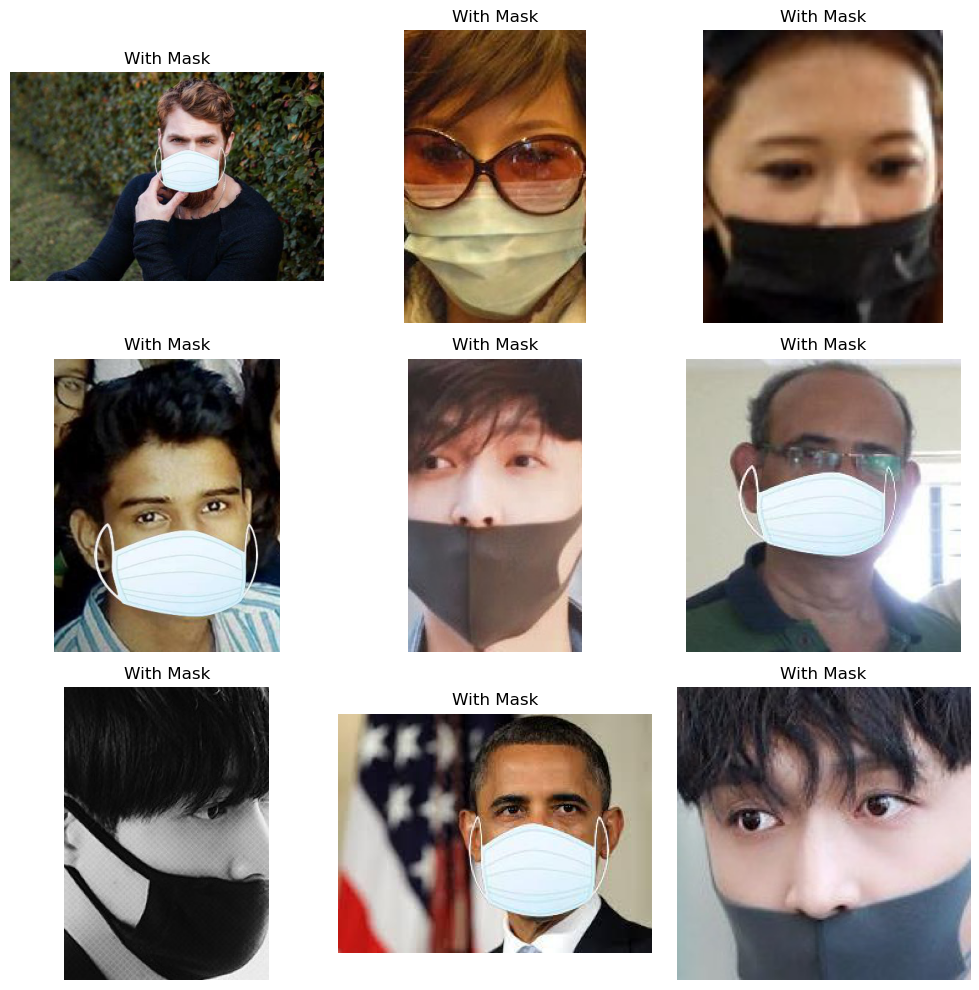

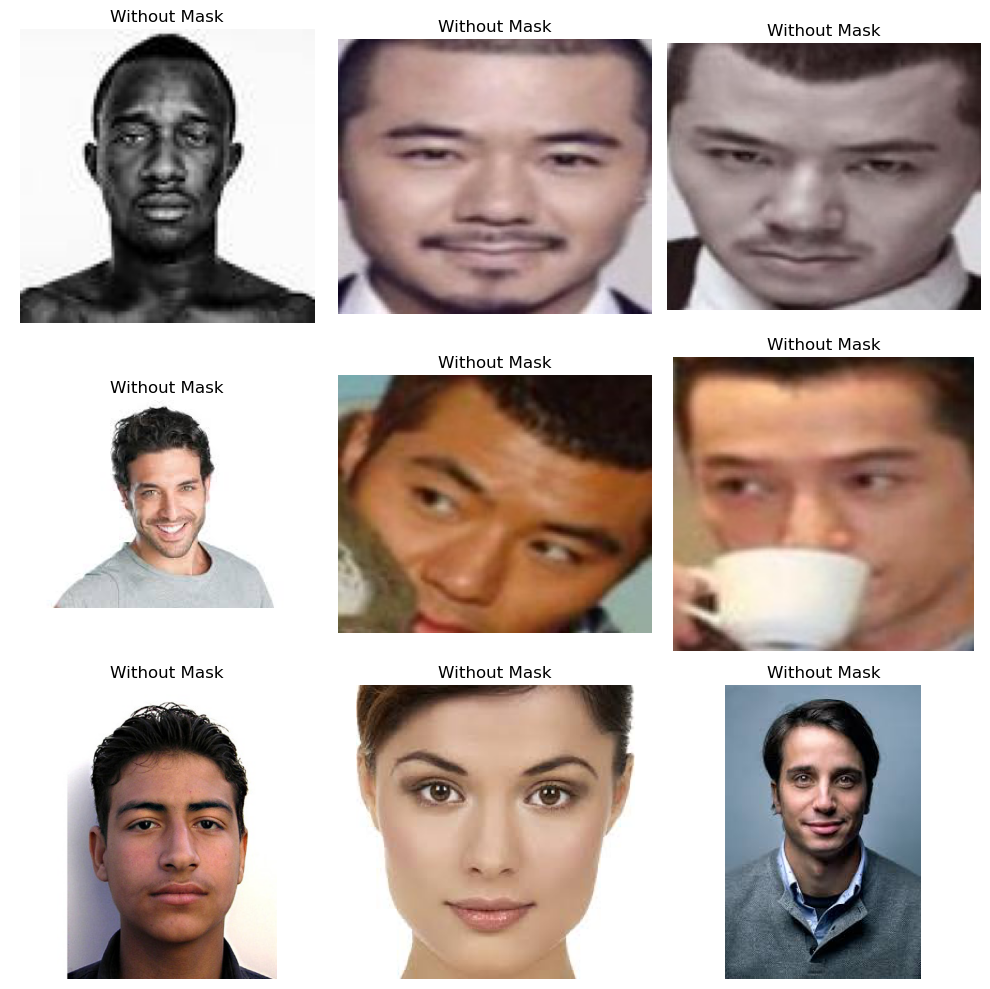

In [11]:
def visualize_samples(folder_path, title, n=9):
    images = os.listdir(folder_path)[:n]
    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = plt.imread(img_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

visualize_samples(with_mask_path, "With Mask")
visualize_samples(without_mask_path, "Without Mask")

Images with mask: 3725
Images without mask: 3828


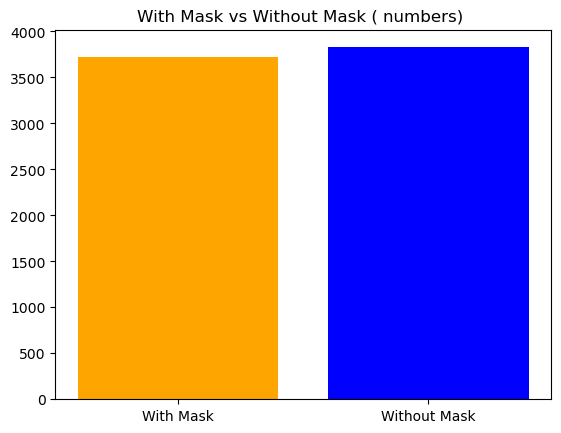

In [14]:
# counting and visualizing the number of images
with_mask_count = len(os.listdir(with_mask_path))
without_mask_count = len(os.listdir(without_mask_path))

print(f"Images with mask: {with_mask_count}")
print(f"Images without mask: {without_mask_count}")

plt.bar(["With Mask", "Without Mask"], [with_mask_count, without_mask_count], color=["orange", "blue"])
plt.title("With Mask vs Without Mask ( numbers) ")
plt.show()

In [15]:
#preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=30,      
    width_shift_range=0.2,   
    height_shift_range=0.2,  
    shear_range=0.2,         
    zoom_range=0.2,          
    horizontal_flip=True     
)

In [16]:
# Data Generators for Training and Validation
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [17]:
# sample counts
print("Training Samples:", train_generator.samples)
print("Validation Samples:", validation_generator.samples)

Training Samples: 6043
Validation Samples: 1510


In [18]:
# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Model Training
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 134s 704ms/step - accuracy: 0.6800 - loss: 0.5912 - val_accuracy: 0.8490 - val_loss: 0.3823
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 90s 477ms/step - accuracy: 0.8188 - loss: 0.4217 - val_accuracy: 0.8517 - val_loss: 0.3714
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 89s 466ms/step - accuracy: 0.8267 - loss: 0.4014 - val_accuracy: 0.8503 - val_loss: 0.3481
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 88s 466ms/step - accuracy: 0.8476 - loss: 0.3754 - val_accuracy: 0.8735 - val_loss: 0.3196
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 90s 477ms/step - accuracy: 0.8341 - loss: 0.3816 - val_accuracy: 0.8675 - val_loss: 0.3210
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 94s 496ms/step - accuracy: 0.8451 - loss: 0.3614 - val_accuracy: 0.8682 - val_loss: 0.3020
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 87s 458ms/step - accuracy: 0.8576 - loss: 0.3319 - val_accuracy: 0.9033 - val_loss: 0.2580
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 87s 460ms/step - accuracy: 0.8527 - loss: 

In [20]:
# Validation Data Evaluation
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 275ms/step - accuracy: 0.9385 - loss: 0.1575
Validation Accuracy: 0.94


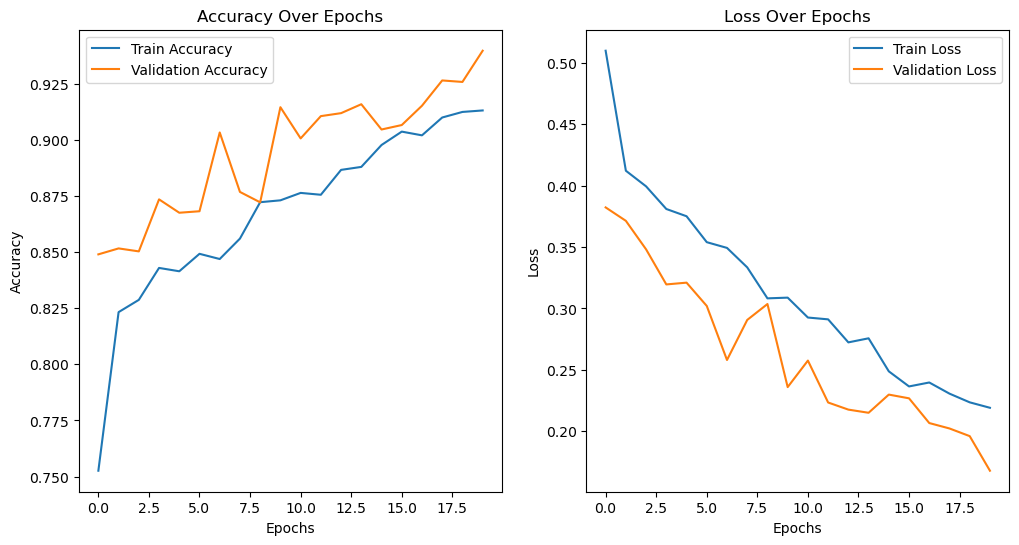

In [21]:
# Plot Training History
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [22]:
# predictions for the validation data
validation_generator.reset()
y_pred = model.predict(validation_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0).flatten()

# true labels from the validation generator
y_true = validation_generator.classes

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step


Confusion Matrix:
[[359 386]
 [370 395]]


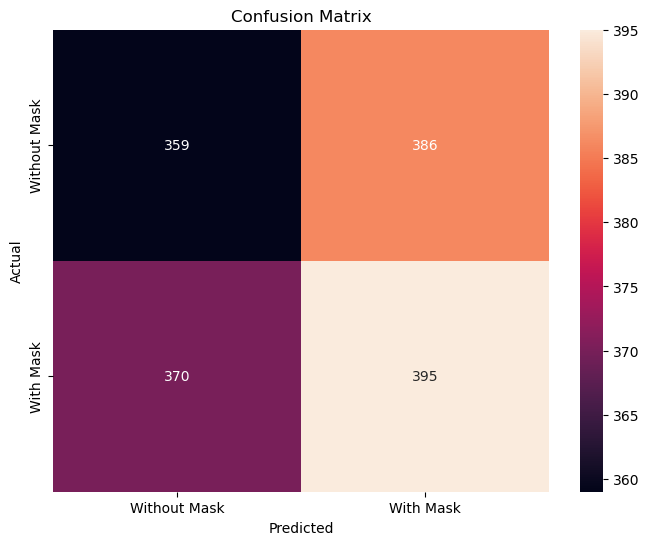

In [26]:
# confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Without Mask', 'With Mask'], yticklabels=['Without Mask', 'With Mask'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))

Classification Report:
              precision    recall  f1-score   support

   with_mask       0.49      0.48      0.49       745
without_mask       0.51      0.52      0.51       765

    accuracy                           0.50      1510
   macro avg       0.50      0.50      0.50      1510
weighted avg       0.50      0.50      0.50      1510

